<a href="https://colab.research.google.com/github/Mphohlalele90/SmartPredictor/blob/data-modeling/AI_software_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 34.0 MB/s eta 0:00:00


🏦 Personal Finance AI - Data Modeling Project
Phase 1: Data Collection & Preparation

📊 Generating synthetic transaction data...
✅ Generated 10000 transactions
📅 Date range: 2023-06-20 to 2025-06-19
💰 Amount range: $5.05 to $1998.56

DATASET OVERVIEW

📋 Dataset Shape: (10000, 7)

🔍 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  10000 non-null  object 
 1   date            10000 non-null  object 
 2   amount          10000 non-null  float64
 3   merchant        10000 non-null  object 
 4   description     10000 non-null  object 
 5   category        10000 non-null  object 
 6   account_type    10000 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.0+ KB
None

📊 First 5 transactions:
  transaction_id        date  amount          merchant  \
0     TXN_000001  2024-03-27   44.38       

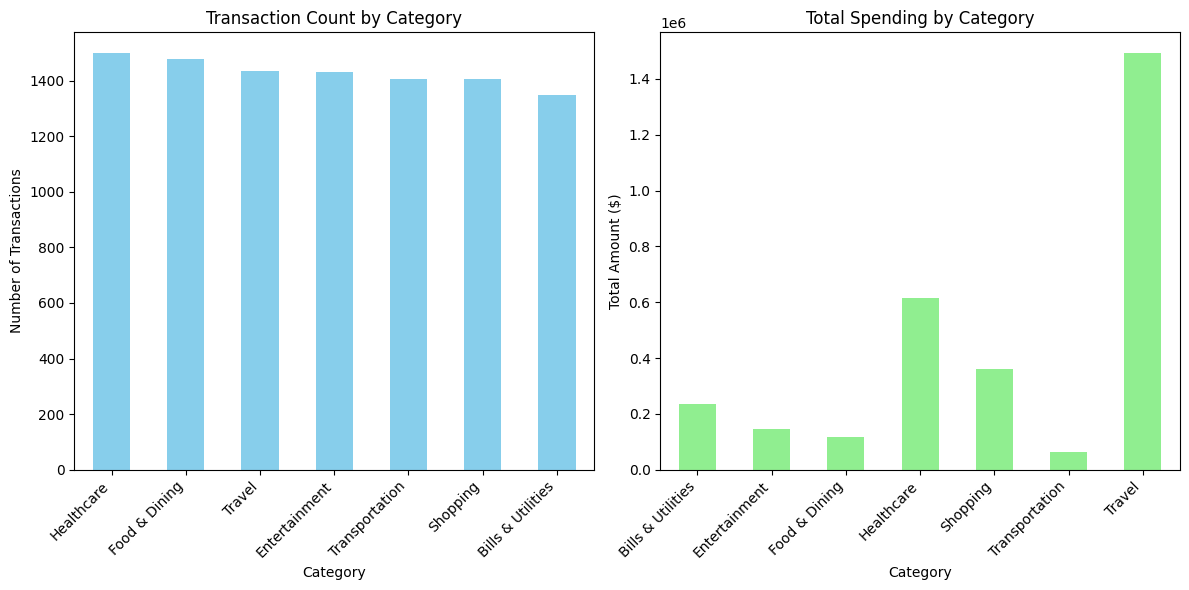


DATA QUALITY CHECK

🔍 Missing Values:
No missing values found ✅

🔍 Duplicate Transactions:
Found 0 duplicate transactions

🔍 Amount Distribution:
Negative amounts: 0
Zero amounts: 0
Extremely high amounts (>$5000): 0

SAVING DATASET
✅ Dataset saved as 'financial_transactions_raw.csv'
✅ Sample dataset saved as 'financial_transactions_sample.csv' (1000 transactions)

NEXT STEPS
1. 🧹 Data Cleaning & Preprocessing (Notebook 02)
2. 🔍 Exploratory Data Analysis (Notebook 03)
3. ⚙️ Feature Engineering (Notebook 04)
4. 🤖 Model Training (Notebook 05)
5. 📊 Model Evaluation (Notebook 06)

🎯 Ready to begin data cleaning and EDA!


In [ ]:
# Personal Finance AI - Data Collection & Initial Setup
# Notebook 01: Data Collection and Synthetic Data Generation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random
from faker import Faker
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

print("🏦 Personal Finance AI - Data Modeling Project")
print("=" * 50)
print("Phase 1: Data Collection & Preparation")
print("=" * 50)

# Initialize Faker for generating realistic data
fake = Faker()

# Define transaction categories and typical merchants
CATEGORIES = {
    'Food & Dining': [
        'McDonald\'s', 'Starbucks', 'Subway', 'Pizza Hut', 'KFC', 'Domino\'s',
        'Chipotle', 'Panera Bread', 'Olive Garden', 'Local Restaurant',
        'Grocery Store', 'Whole Foods', 'Safeway', 'Trader Joe\'s'
    ],
    'Transportation': [
        'Shell Gas Station', 'Exxon', 'BP Gas', 'Uber', 'Lyft', 'Metro Transit',
        'Parking Meter', 'Car Repair Shop', 'Auto Parts Store', 'Taxi Service'
    ],
    'Shopping': [
        'Amazon', 'Target', 'Walmart', 'Best Buy', 'Macy\'s', 'Home Depot',
        'CVS Pharmacy', 'Nike Store', 'Apple Store', 'Online Retailer'
    ],
    'Entertainment': [
        'Netflix', 'Spotify', 'Movie Theater', 'Concert Venue', 'Sports Bar',
        'Bowling Alley', 'Gym Membership', 'Gaming Store', 'Book Store'
    ],
    'Bills & Utilities': [
        'Electric Company', 'Gas Company', 'Water Utility', 'Internet Provider',
        'Phone Company', 'Insurance Payment', 'Rent Payment', 'Mortgage'
    ],
    'Healthcare': [
        'Doctor Office', 'Pharmacy', 'Dentist', 'Hospital', 'Lab Test',
        'Eye Doctor', 'Physical Therapy', 'Health Insurance'
    ],
    'Travel': [
        'Airline', 'Hotel', 'Rental Car', 'Travel Agency', 'Airbnb',
        'Train Ticket', 'Bus Ticket', 'Travel Insurance'
    ]
}

# Amount ranges for each category (min, max)
AMOUNT_RANGES = {
    'Food & Dining': (5, 150),
    'Transportation': (10, 80),
    'Shopping': (15, 500),
    'Entertainment': (10, 200),
    'Bills & Utilities': (50, 300),
    'Healthcare': (25, 800),
    'Travel': (100, 2000)
}

def generate_transaction_data(num_transactions=10000):
    """
    Generate synthetic transaction data for training our ML model
    """
    transactions = []

    # Generate transactions over the past 2 years
    start_date = datetime.now() - timedelta(days=730)

    for i in range(num_transactions):
        # Select random category
        category = random.choice(list(CATEGORIES.keys()))

        # Select random merchant from category
        merchant = random.choice(CATEGORIES[category])

        # Generate amount based on category
        min_amount, max_amount = AMOUNT_RANGES[category]
        amount = round(random.uniform(min_amount, max_amount), 2)

        # Generate random date within range
        random_days = random.randint(0, 730)
        transaction_date = start_date + timedelta(days=random_days)

        # Generate transaction description
        descriptions = [
            f"POS Purchase at {merchant}",
            f"Online purchase {merchant}",
            f"Payment to {merchant}",
            f"{merchant} - Card Transaction",
            f"Purchase {merchant}"
        ]
        description = random.choice(descriptions)

        # Account type
        account_type = random.choice(['Checking', 'Credit', 'Savings'])

        # Create transaction record
        transaction = {
            'transaction_id': f'TXN_{i+1:06d}',
            'date': transaction_date.strftime('%Y-%m-%d'),
            'amount': amount,
            'merchant': merchant,
            'description': description,
            'category': category,
            'account_type': account_type
        }

        transactions.append(transaction)

    return pd.DataFrame(transactions)

# Generate synthetic dataset
print("\n📊 Generating synthetic transaction data...")
df = generate_transaction_data(10000)

print(f"✅ Generated {len(df)} transactions")
print(f"📅 Date range: {df['date'].min()} to {df['date'].max()}")
print(f"💰 Amount range: ${df['amount'].min():.2f} to ${df['amount'].max():.2f}")

# Display basic information about the dataset
print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)

print("\n📋 Dataset Shape:", df.shape)
print("\n🔍 Column Information:")
print(df.info())

print("\n📊 First 5 transactions:")
print(df.head())

print("\n📈 Basic Statistics:")
print(df.describe())

# Category distribution
print("\n" + "="*50)
print("CATEGORY ANALYSIS")
print("="*50)

category_counts = df['category'].value_counts()
print("\n📊 Transactions per Category:")
print(category_counts)

# Plot category distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
category_counts.plot(kind='bar', color='skyblue')
plt.title('Transaction Count by Category')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
category_amounts = df.groupby('category')['amount'].sum()
category_amounts.plot(kind='bar', color='lightgreen')
plt.title('Total Spending by Category')
plt.xlabel('Category')
plt.ylabel('Total Amount ($)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Check for data quality issues
print("\n" + "="*50)
print("DATA QUALITY CHECK")
print("="*50)

print("\n🔍 Missing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found ✅")

print("\n🔍 Duplicate Transactions:")
duplicates = df.duplicated().sum()
print(f"Found {duplicates} duplicate transactions")

print("\n🔍 Amount Distribution:")
print(f"Negative amounts: {(df['amount'] < 0).sum()}")
print(f"Zero amounts: {(df['amount'] == 0).sum()}")
print(f"Extremely high amounts (>$5000): {(df['amount'] > 5000).sum()}")

# Save the dataset
print("\n" + "="*50)
print("SAVING DATASET")
print("="*50)

# Save to CSV
csv_filename = 'financial_transactions_raw.csv'
df.to_csv(csv_filename, index=False)
print(f"✅ Dataset saved as '{csv_filename}'")

# Create a sample for quick testing
sample_df = df.sample(n=1000, random_state=42)
sample_filename = 'financial_transactions_sample.csv'
sample_df.to_csv(sample_filename, index=False)
print(f"✅ Sample dataset saved as '{sample_filename}' (1000 transactions)")

print("\n" + "="*50)
print("NEXT STEPS")
print("="*50)
print("1. 🧹 Data Cleaning & Preprocessing (Notebook 02)")
print("2. 🔍 Exploratory Data Analysis (Notebook 03)")
print("3. ⚙️ Feature Engineering (Notebook 04)")
print("4. 🤖 Model Training (Notebook 05)")
print("5. 📊 Model Evaluation (Notebook 06)")

print("\n🎯 Ready to begin data cleaning and EDA!")

🧹 Personal Finance AI - Data Cleaning & Preprocessing
Phase 2: Data Cleaning and Preparation

📂 Loading raw transaction data...
✅ Successfully loaded 10000 transactions
📊 Original dataset shape: (10000, 7)

1️⃣ DATA QUALITY ASSESSMENT

🔍 Missing Values Analysis:
✅ No missing values found!

🔍 Duplicate Analysis:
Total duplicates: 0

🔍 Data Types Analysis:
transaction_id     object
date               object
amount            float64
merchant           object
description        object
category           object
account_type       object
dtype: object

🔍 Unique Values per Column:
transaction_id: 10000 unique values (100.0%)
date: 731 unique values (7.3%)
amount: 8957 unique values (89.6%)
merchant: 67 unique values (0.7%)
description: 335 unique values (3.4%)
category: 7 unique values (0.1%)
account_type: 3 unique values (0.0%)

2️⃣ MISSING VALUES HANDLING
🎯 Introduced 200 missing values for demonstration

Missing values after simulation:
transaction_id      0
date                0
amount  

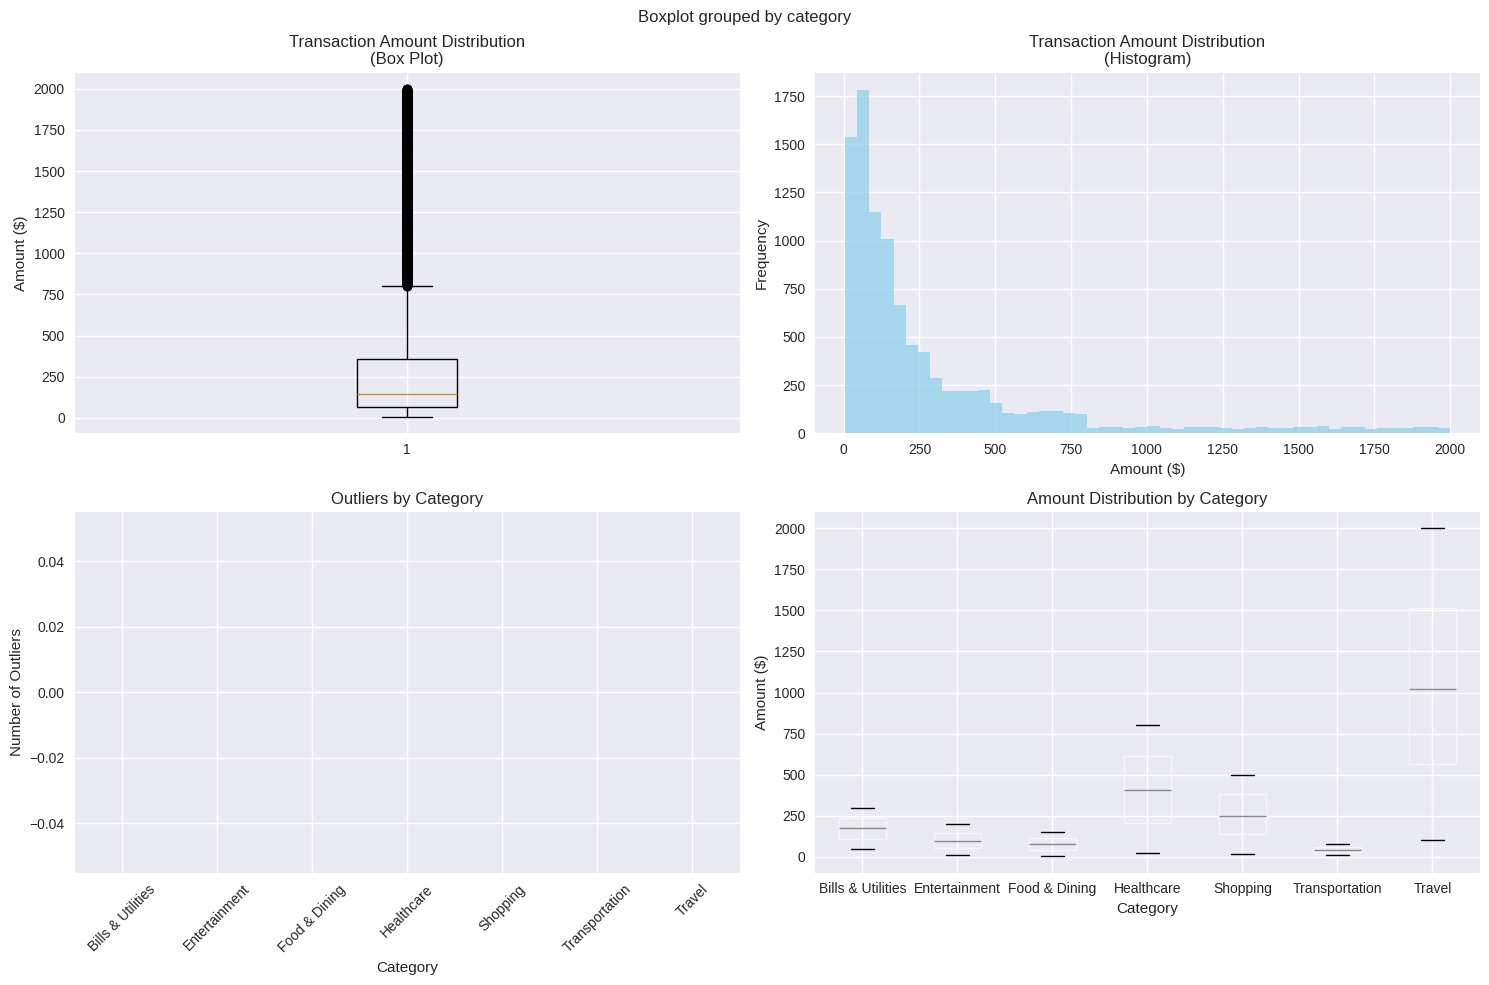


🔧 Original dataset size: 10000
🔧 Capped 1000 outliers in amount
   New range: $20.81 to $1320.03
✅ Processed dataset size: 10000

4️⃣ TEXT PREPROCESSING
🔧 Cleaning merchant names...
🔧 Cleaning transaction descriptions...
🔧 Extracting text features...
✅ Text preprocessing completed!

New text-based features:
  - merchant_clean
  - description_clean
  - merchant_length
  - description_word_count
  - has_online
  - has_pos
  - has_purchase
  - has_payment
  - has_transaction
  - has_card

5️⃣ CATEGORICAL ENCODING
🔧 Applying Label Encoding...
🔧 Applying One-Hot Encoding...
🔧 Applying Target Encoding for merchants...
✅ Categorical encoding completed!
Dataset shape after encoding: (10000, 27)

6️⃣ FEATURE SCALING AND NORMALIZATION
🔧 Applying StandardScaler to numerical features...
   ✓ Scaled amount
   ✓ Scaled merchant_length
   ✓ Scaled description_word_count
   ✓ Scaled merchant_avg_amount
   ✓ Scaled merchant_frequency
✅ Feature normalization completed!

7️⃣ DATE/TIME FEATURE ENGINEERIN

In [ ]:
# Personal Finance AI - Data Cleaning & Preprocessing
# Notebook 02: Data Cleaning, Missing Values, Outliers, and Feature Preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🧹 Personal Finance AI - Data Cleaning & Preprocessing")
print("=" * 60)
print("Phase 2: Data Cleaning and Preparation")
print("=" * 60)

# Load the raw dataset
print("\n📂 Loading raw transaction data...")
try:
    df = pd.read_csv('financial_transactions_raw.csv')
    print(f"✅ Successfully loaded {len(df)} transactions")
except FileNotFoundError:
    print("❌ Raw data file not found. Please run Notebook 01 first.")
    exit()

# Create a copy for cleaning
df_original = df.copy()
df_clean = df.copy()

print(f"📊 Original dataset shape: {df_clean.shape}")

# ============================================================================
# SECTION 1: DATA QUALITY ASSESSMENT
# ============================================================================

print("\n" + "="*60)
print("1️⃣ DATA QUALITY ASSESSMENT")
print("="*60)

def assess_data_quality(df):
    """Comprehensive data quality assessment"""

    print("\n🔍 Missing Values Analysis:")
    missing_stats = df.isnull().sum()
    missing_percent = (missing_stats / len(df)) * 100

    missing_df = pd.DataFrame({
        'Missing_Count': missing_stats,
        'Missing_Percentage': missing_percent
    })
    missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

    if len(missing_df) > 0:
        print(missing_df)
    else:
        print("✅ No missing values found!")

    print("\n🔍 Duplicate Analysis:")
    duplicates = df.duplicated().sum()
    print(f"Total duplicates: {duplicates}")

    if duplicates > 0:
        duplicate_subset = df.duplicated(subset=['date', 'merchant', 'amount']).sum()
        print(f"Likely duplicate transactions (same date, merchant, amount): {duplicate_subset}")

    print("\n🔍 Data Types Analysis:")
    print(df.dtypes)

    print("\n🔍 Unique Values per Column:")
    for col in df.columns:
        unique_count = df[col].nunique()
        total_count = len(df)
        print(f"{col}: {unique_count} unique values ({unique_count/total_count*100:.1f}%)")

    return missing_df

missing_analysis = assess_data_quality(df_clean)

# ============================================================================
# SECTION 2: MISSING VALUES HANDLING
# ============================================================================

print("\n" + "="*60)
print("2️⃣ MISSING VALUES HANDLING")
print("="*60)

# Simulate some missing values for demonstration (since synthetic data is complete)
np.random.seed(42)
n_missing = int(0.02 * len(df_clean))  # 2% missing values

# Randomly introduce missing values
missing_indices_merchant = np.random.choice(df_clean.index, size=n_missing//2, replace=False)
missing_indices_description = np.random.choice(df_clean.index, size=n_missing//2, replace=False)

df_clean.loc[missing_indices_merchant, 'merchant'] = np.nan
df_clean.loc[missing_indices_description, 'description'] = np.nan

print(f"🎯 Introduced {n_missing} missing values for demonstration")
print("\nMissing values after simulation:")
print(df_clean.isnull().sum())

def handle_missing_values(df):
    """Handle missing values with appropriate strategies"""

    df_imputed = df.copy()

    # Strategy 1: Fill missing merchants with 'Unknown Merchant'
    if df_imputed['merchant'].isnull().sum() > 0:
        print(f"\n🔧 Filling {df_imputed['merchant'].isnull().sum()} missing merchant names...")
        df_imputed['merchant'] = df_imputed['merchant'].fillna('Unknown Merchant')

    # Strategy 2: Fill missing descriptions using merchant info
    if df_imputed['description'].isnull().sum() > 0:
        print(f"🔧 Filling {df_imputed['description'].isnull().sum()} missing descriptions...")
        df_imputed['description'] = df_imputed['description'].fillna(
            'Transaction at ' + df_imputed['merchant']
        )

    # Strategy 3: For numerical values, use median imputation by category
    numerical_cols = ['amount']
    for col in numerical_cols:
        if df_imputed[col].isnull().sum() > 0:
            print(f"🔧 Imputing missing {col} values using category median...")
            df_imputed[col] = df_imputed.groupby('category')[col].transform(
                lambda x: x.fillna(x.median())
            )

    return df_imputed

df_clean = handle_missing_values(df_clean)
print("\n✅ Missing values handled!")
print("Missing values after cleaning:")
print(df_clean.isnull().sum())

# ============================================================================
# SECTION 3: OUTLIER DETECTION AND HANDLING
# ============================================================================

print("\n" + "="*60)
print("3️⃣ OUTLIER DETECTION AND HANDLING")
print("="*60)

def detect_outliers_iqr(df, column):
    """Detect outliers using IQR method"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def detect_outliers_zscore(df, column, threshold=3):
    """Detect outliers using Z-score method"""
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    outliers = df[z_scores > threshold]
    return outliers

# Analyze outliers in transaction amounts
print("\n💰 Analyzing outliers in transaction amounts:")

# IQR method
outliers_iqr, lower_bound, upper_bound = detect_outliers_iqr(df_clean, 'amount')
print(f"IQR Method: {len(outliers_iqr)} outliers detected")
print(f"Amount range: ${lower_bound:.2f} to ${upper_bound:.2f}")

# Z-score method
outliers_zscore = detect_outliers_zscore(df_clean, 'amount')
print(f"Z-score Method: {len(outliers_zscore)} outliers detected")

# Visualize outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Box plot
axes[0,0].boxplot(df_clean['amount'])
axes[0,0].set_title('Transaction Amount Distribution\n(Box Plot)')
axes[0,0].set_ylabel('Amount ($)')

# Histogram
axes[0,1].hist(df_clean['amount'], bins=50, alpha=0.7, color='skyblue')
axes[0,1].set_title('Transaction Amount Distribution\n(Histogram)')
axes[0,1].set_xlabel('Amount ($)')
axes[0,1].set_ylabel('Frequency')

# Outliers by category
category_outliers = df_clean.groupby('category')['amount'].apply(
    lambda x: len(detect_outliers_iqr(pd.DataFrame({'amount': x}), 'amount')[0])
)
category_outliers.plot(kind='bar', ax=axes[1,0], color='lightcoral')
axes[1,0].set_title('Outliers by Category')
axes[1,0].set_xlabel('Category')
axes[1,0].set_ylabel('Number of Outliers')
axes[1,0].tick_params(axis='x', rotation=45)

# Amount distribution by category
df_clean.boxplot(column='amount', by='category', ax=axes[1,1])
axes[1,1].set_title('Amount Distribution by Category')
axes[1,1].set_xlabel('Category')
axes[1,1].set_ylabel('Amount ($)')

plt.tight_layout()
plt.show()

# Handle outliers - Cap extreme values instead of removing
def handle_outliers(df, column, method='cap'):
    """Handle outliers by capping or removing them"""

    df_processed = df.copy()

    if method == 'cap':
        # Cap outliers at 95th and 5th percentiles
        upper_cap = df[column].quantile(0.95)
        lower_cap = df[column].quantile(0.05)

        original_outliers = ((df[column] > upper_cap) | (df[column] < lower_cap)).sum()

        df_processed[column] = df_processed[column].clip(lower=lower_cap, upper=upper_cap)

        print(f"🔧 Capped {original_outliers} outliers in {column}")
        print(f"   New range: ${lower_cap:.2f} to ${upper_cap:.2f}")

    elif method == 'remove':
        # Remove extreme outliers (beyond 3 standard deviations)
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
        df_processed = df_processed[z_scores <= 3]
        removed = len(df) - len(df_processed)
        print(f"🔧 Removed {removed} extreme outliers from {column}")

    return df_processed

# Apply outlier handling
print(f"\n🔧 Original dataset size: {len(df_clean)}")
df_clean = handle_outliers(df_clean, 'amount', method='cap')
print(f"✅ Processed dataset size: {len(df_clean)}")

# ============================================================================
# SECTION 4: TEXT PREPROCESSING
# ============================================================================

print("\n" + "="*60)
print("4️⃣ TEXT PREPROCESSING")
print("="*60)

def clean_text_data(df):
    """Clean and standardize text fields"""

    df_text_clean = df.copy()

    # Clean merchant names
    print("🔧 Cleaning merchant names...")
    df_text_clean['merchant_clean'] = df_text_clean['merchant'].str.strip()  # Remove whitespace
    df_text_clean['merchant_clean'] = df_text_clean['merchant_clean'].str.upper()  # Standardize case
    df_text_clean['merchant_clean'] = df_text_clean['merchant_clean'].str.replace(r'[^\w\s]', '', regex=True)  # Remove special chars

    # Clean descriptions
    print("🔧 Cleaning transaction descriptions...")
    df_text_clean['description_clean'] = df_text_clean['description'].str.strip()
    df_text_clean['description_clean'] = df_text_clean['description_clean'].str.upper()
    df_text_clean['description_clean'] = df_text_clean['description_clean'].str.replace(r'[^\w\s]', '', regex=True)

    # Extract key features from text
    print("🔧 Extracting text features...")

    # Merchant length
    df_text_clean['merchant_length'] = df_text_clean['merchant_clean'].str.len()

    # Number of words in description
    df_text_clean['description_word_count'] = df_text_clean['description_clean'].str.split().str.len()

    # Common keywords extraction
    keywords = ['ONLINE', 'POS', 'PURCHASE', 'PAYMENT', 'TRANSACTION', 'CARD']
    for keyword in keywords:
        df_text_clean[f'has_{keyword.lower()}'] = df_text_clean['description_clean'].str.contains(keyword).astype(int)

    return df_text_clean

df_clean = clean_text_data(df_clean)

print("✅ Text preprocessing completed!")
print("\nNew text-based features:")
text_features = ['merchant_clean', 'description_clean', 'merchant_length', 'description_word_count'] + \
                [col for col in df_clean.columns if col.startswith('has_')]
for feature in text_features:
    print(f"  - {feature}")

# ============================================================================
# SECTION 5: CATEGORICAL ENCODING
# ============================================================================

print("\n" + "="*60)
print("5️⃣ CATEGORICAL ENCODING")
print("="*60)

def encode_categorical_variables(df):
    """Encode categorical variables for machine learning"""

    df_encoded = df.copy()

    # Label Encoding for ordinal variables (if any)
    print("🔧 Applying Label Encoding...")

    # Account type encoding (assuming some order: Savings < Checking < Credit)
    account_mapping = {'Savings': 0, 'Checking': 1, 'Credit': 2}
    df_encoded['account_type_encoded'] = df_encoded['account_type'].map(account_mapping)

    # One-Hot Encoding for nominal categorical variables
    print("🔧 Applying One-Hot Encoding...")

    # One-hot encode categories (this will be our target, but useful for analysis)
    category_dummies = pd.get_dummies(df_encoded['category'], prefix='category')
    df_encoded = pd.concat([df_encoded, category_dummies], axis=1)

    # Target encoding for high-cardinality categorical variables (merchant)
    print("🔧 Applying Target Encoding for merchants...")

    # Calculate mean amount per merchant (simple target encoding)
    merchant_mean_amount = df_encoded.groupby('merchant_clean')['amount'].mean()
    df_encoded['merchant_avg_amount'] = df_encoded['merchant_clean'].map(merchant_mean_amount)

    # Frequency encoding for merchants
    merchant_frequency = df_encoded['merchant_clean'].value_counts().to_dict()
    df_encoded['merchant_frequency'] = df_encoded['merchant_clean'].map(merchant_frequency)

    return df_encoded

df_clean = encode_categorical_variables(df_clean)

print("✅ Categorical encoding completed!")
print(f"Dataset shape after encoding: {df_clean.shape}")

# ============================================================================
# SECTION 6: FEATURE SCALING AND NORMALIZATION
# ============================================================================

print("\n" + "="*60)
print("6️⃣ FEATURE SCALING AND NORMALIZATION")
print("="*60)

def normalize_numerical_features(df):
    """Normalize numerical features for better model performance"""

    df_normalized = df.copy()

    # Identify numerical columns to normalize
    numerical_cols = ['amount', 'merchant_length', 'description_word_count',
                     'merchant_avg_amount', 'merchant_frequency']

    print("🔧 Applying StandardScaler to numerical features...")

    # Standard scaling (z-score normalization)
    scaler = StandardScaler()

    for col in numerical_cols:
        if col in df_normalized.columns:
            # Store original values for reference
            df_normalized[f'{col}_original'] = df_normalized[col]
            # Apply scaling
            df_normalized[f'{col}_scaled'] = scaler.fit_transform(df_normalized[[col]])
            print(f"   ✓ Scaled {col}")

    return df_normalized, scaler

df_clean, scaler = normalize_numerical_features(df_clean)

print("✅ Feature normalization completed!")

# ============================================================================
# SECTION 7: DATE/TIME FEATURE ENGINEERING
# ============================================================================

print("\n" + "="*60)
print("7️⃣ DATE/TIME FEATURE ENGINEERING")
print("="*60)

def extract_datetime_features(df):
    """Extract useful features from datetime column"""

    df_datetime = df.copy()

    print("🔧 Converting date column to datetime...")
    df_datetime['date'] = pd.to_datetime(df_datetime['date'])

    print("🔧 Extracting datetime features...")

    # Basic datetime components
    df_datetime['year'] = df_datetime['date'].dt.year
    df_datetime['month'] = df_datetime['date'].dt.month
    df_datetime['day'] = df_datetime['date'].dt.day
    df_datetime['day_of_week'] = df_datetime['date'].dt.dayofweek  # 0=Monday
    df_datetime['day_of_year'] = df_datetime['date'].dt.dayofyear

    # Derived features
    df_datetime['is_weekend'] = (df_datetime['day_of_week'] >= 5).astype(int)
    df_datetime['is_month_start'] = df_datetime['date'].dt.is_month_start.astype(int)
    df_datetime['is_month_end'] = df_datetime['date'].dt.is_month_end.astype(int)

    # Seasonal features
    df_datetime['quarter'] = df_datetime['date'].dt.quarter
    df_datetime['season'] = df_datetime['month'].map({
        12: 'Winter', 1: 'Winter', 2: 'Winter',
        3: 'Spring', 4: 'Spring', 5: 'Spring',
        6: 'Summer', 7: 'Summer', 8: 'Summer',
        9: 'Fall', 10: 'Fall', 11: 'Fall'
    })

    # Cyclical encoding for periodic features
    # Month cyclical encoding
    df_datetime['month_sin'] = np.sin(2 * np.pi * df_datetime['month'] / 12)
    df_datetime['month_cos'] = np.cos(2 * np.pi * df_datetime['month'] / 12)

    # Day of week cyclical encoding
    df_datetime['dow_sin'] = np.sin(2 * np.pi * df_datetime['day_of_week'] / 7)
    df_datetime['dow_cos'] = np.cos(2 * np.pi * df_datetime['day_of_week'] / 7)

    return df_datetime

df_clean = extract_datetime_features(df_clean)

print("✅ DateTime feature engineering completed!")

datetime_features = ['year', 'month', 'day', 'day_of_week', 'day_of_year',
                    'is_weekend', 'is_month_start', 'is_month_end', 'quarter',
                    'season', 'month_sin', 'month_cos', 'dow_sin', 'dow_cos']
print(f"Created {len(datetime_features)} datetime features")

# ============================================================================
# SECTION 8: FINAL DATA QUALITY CHECK
# ============================================================================

print("\n" + "="*60)
print("8️⃣ FINAL DATA QUALITY CHECK")
print("="*60)

def final_quality_check(df):
    """Perform final data quality assessment"""

    print("🔍 Final Dataset Summary:")
    print(f"   Shape: {df.shape}")
    print(f"   Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    print("\n🔍 Missing Values Check:")
    missing = df.isnull().sum()
    if missing.sum() == 0:
        print("   ✅ No missing values!")
    else:
        print("   ❌ Still has missing values:")
        print(missing[missing > 0])

    print("\n🔍 Data Types Summary:")
    print(df.dtypes.value_counts())

    print("\n🔍 Numerical Features Summary:")
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    print(f"   {len(numerical_cols)} numerical features")

    print("\n🔍 Categorical Features Summary:")
    categorical_cols = df.select_dtypes(include=['object']).columns
    print(f"   {len(categorical_cols)} categorical features")

    return len(numerical_cols), len(categorical_cols)

num_features, cat_features = final_quality_check(df_clean)

# ============================================================================
# SECTION 9: SAVE CLEANED DATASET
# ============================================================================

print("\n" + "="*60)
print("9️⃣ SAVING CLEANED DATASET")
print("="*60)

# Save the cleaned dataset
cleaned_filename = 'financial_transactions_cleaned.csv'
df_clean.to_csv(cleaned_filename, index=False)

print(f"✅ Cleaned dataset saved as '{cleaned_filename}'")
print(f"   Original size: {df_original.shape}")
print(f"   Cleaned size: {df_clean.shape}")
print(f"   Features added: {df_clean.shape[1] - df_original.shape[1]}")

# Create a feature summary
feature_summary = pd.DataFrame({
    'Feature': df_clean.columns,
    'Type': df_clean.dtypes,
    'Missing_Values': df_clean.isnull().sum(),
    'Unique_Values': df_clean.nunique()
})

feature_summary_filename = 'feature_summary.csv'
feature_summary.to_csv(feature_summary_filename, index=False)
print(f"✅ Feature summary saved as '{feature_summary_filename}'")

# ============================================================================
# SECTION 10: CLEANING SUMMARY REPORT
# ============================================================================

print("\n" + "="*60)
print("🏁 DATA CLEANING SUMMARY REPORT")
print("="*60)

print("\n📊 TRANSFORMATIONS APPLIED:")
print("   ✅ Missing value imputation")
print("   ✅ Outlier detection and capping")
print("   ✅ Text preprocessing and cleaning")
print("   ✅ Categorical variable encoding")
print("   ✅ Feature scaling and normalization")
print("   ✅ DateTime feature engineering")

print(f"\n📈 DATASET STATISTICS:")
print(f"   Original features: {df_original.shape[1]}")
print(f"   Final features: {df_clean.shape[1]}")
print(f"   New features created: {df_clean.shape[1] - df_original.shape[1]}")
print(f"   Records processed: {len(df_clean)}")

print(f"\n🎯 FEATURE BREAKDOWN:")
print(f"   Numerical features: {num_features}")
print(f"   Categorical features: {cat_features}")
print(f"   Text-derived features: {len([col for col in df_clean.columns if 'clean' in col or 'length' in col or 'count' in col])}")
print(f"   DateTime features: {len(datetime_features)}")
print(f"   Encoded features: {len([col for col in df_clean.columns if 'encoded' in col or 'category_' in col])}")

print("\n🚀 READY FOR EXPLORATORY DATA ANALYSIS!")
print("   Next: Run Notebook 03_EDA_Analysis.ipynb")

# Display first few rows of cleaned data
print("\n📋 Sample of cleaned dataset:")
display_cols = ['date', 'amount', 'merchant_clean', 'category', 'is_weekend', 'month', 'amount_scaled']
print(df_clean[display_cols].head(10))

In [ ]:
# Comprehensive Exploratory Data Analysis (EDA) Notebook
# Data Specialist Workflow - Phase 2: Data Exploration & Insights

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class EDAAnalyzer:
    """
    Comprehensive EDA class for automated data exploration and insights generation
    """

    def __init__(self, df, target_column=None):
        """
        Initialize EDA analyzer

        Args:
            df (pd.DataFrame): Cleaned dataset
            target_column (str): Target variable for supervised learning
        """
        self.df = df.copy()
        self.target_column = target_column
        self.numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        self.categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
        self.datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

        # Remove target from feature lists if specified
        if target_column and target_column in self.numeric_cols:
            self.numeric_cols.remove(target_column)
        elif target_column and target_column in self.categorical_cols:
            self.categorical_cols.remove(target_column)

    def dataset_overview(self):
        """Generate comprehensive dataset overview"""
        print("=" * 80)
        print("📊 DATASET OVERVIEW")
        print("=" * 80)

        # Basic info
        print(f"Dataset Shape: {self.df.shape}")
        print(f"Memory Usage: {self.df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
        print(f"Numeric Columns: {len(self.numeric_cols)}")
        print(f"Categorical Columns: {len(self.categorical_cols)}")
        print(f"DateTime Columns: {len(self.datetime_cols)}")

        if self.target_column:
            print(f"Target Variable: {self.target_column}")
            if self.target_column in self.df.columns:
                target_type = "Regression" if self.df[self.target_column].dtype in ['int64', 'float64'] else "Classification"
                print(f"Problem Type: {target_type}")

        print("\n" + "=" * 40)
        print("📈 DATA QUALITY SUMMARY")
        print("=" * 40)

        # Missing values summary
        missing_summary = self.df.isnull().sum()
        missing_pct = (missing_summary / len(self.df)) * 100

        quality_df = pd.DataFrame({
            'Column': self.df.columns,
            'Data_Type': self.df.dtypes,
            'Missing_Count': missing_summary,
            'Missing_Percentage': missing_pct,
            'Unique_Values': [self.df[col].nunique() for col in self.df.columns],
            'Memory_Usage_KB': self.df.memory_usage(deep=True).values / 1024
        })

        print(quality_df.to_string(index=False))

        return quality_df

    def statistical_summary(self):
        """Generate detailed statistical summary"""
        print("\n" + "=" * 80)
        print("📊 STATISTICAL SUMMARY")
        print("=" * 80)

        if self.numeric_cols:
            print("\n🔢 NUMERIC VARIABLES SUMMARY:")
            print("-" * 50)

            # Enhanced describe with additional statistics
            desc = self.df[self.numeric_cols].describe()

            # Add additional statistics
            additional_stats = pd.DataFrame({
                'skewness': self.df[self.numeric_cols].skew(),
                'kurtosis': self.df[self.numeric_cols].kurtosis(),
                'cv': self.df[self.numeric_cols].std() / self.df[self.numeric_cols].mean(),
                'outlier_count': [self.count_outliers(self.df[col]) for col in self.numeric_cols]
            })

            combined_stats = pd.concat([desc, additional_stats.T])
            print(combined_stats.round(3))

        if self.categorical_cols:
            print("\n🏷️ CATEGORICAL VARIABLES SUMMARY:")
            print("-" * 50)

            cat_summary = []
            for col in self.categorical_cols:
                cat_info = {
                    'Column': col,
                    'Unique_Values': self.df[col].nunique(),
                    'Most_Frequent': self.df[col].mode().iloc[0] if not self.df[col].mode().empty else 'N/A',
                    'Most_Frequent_Count': self.df[col].value_counts().iloc[0] if len(self.df[col].value_counts()) > 0 else 0,
                    'Most_Frequent_Percentage': (self.df[col].value_counts().iloc[0] / len(self.df)) * 100 if len(self.df[col].value_counts()) > 0 else 0
                }
                cat_summary.append(cat_info)

            cat_df = pd.DataFrame(cat_summary)
            print(cat_df.to_string(index=False))

    def count_outliers(self, series):
        """Count outliers using IQR method"""
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return ((series < lower_bound) | (series > upper_bound)).sum()

    def distribution_analysis(self):
        """Analyze distributions of numeric variables"""
        if not self.numeric_cols:
            print("No numeric columns found for distribution analysis.")
            return

        print("\n" + "=" * 80)
        print("📈 DISTRIBUTION ANALYSIS")
        print("=" * 80)

        n_cols = min(4, len(self.numeric_cols))
        n_rows = (len(self.numeric_cols) + n_cols - 1) // n_cols

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
        axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

        for i, col in enumerate(self.numeric_cols):
            if i < len(axes):
                # Histogram with KDE
                self.df[col].hist(bins=30, alpha=0.7, ax=axes[i], edgecolor='black')
                axes[i].axvline(self.df[col].mean(), color='red', linestyle='--', label=f'Mean: {self.df[col].mean():.2f}')
                axes[i].axvline(self.df[col].median(), color='green', linestyle='--', label=f'Median: {self.df[col].median():.2f}')
                axes[i].set_title(f'Distribution of {col}')
                axes[i].set_xlabel(col)
                axes[i].set_ylabel('Frequency')
                axes[i].legend()
                axes[i].grid(True, alpha=0.3)

        # Hide empty subplots
        for i in range(len(self.numeric_cols), len(axes)):
            axes[i].set_visible(False)

        plt.tight_layout()
        plt.show()

        # Box plots for outlier detection
        if len(self.numeric_cols) > 0:
            fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
            axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

            for i, col in enumerate(self.numeric_cols):
                if i < len(axes):
                    self.df.boxplot(column=col, ax=axes[i])
                    axes[i].set_title(f'Box Plot of {col}')
                    axes[i].grid(True, alpha=0.3)

            # Hide empty subplots
            for i in range(len(self.numeric_cols), len(axes)):
                axes[i].set_visible(False)

            plt.tight_layout()
            plt.show()

    def correlation_analysis(self):
        """Perform comprehensive correlation analysis"""
        if len(self.numeric_cols) < 2:
            print("Insufficient numeric columns for correlation analysis.")
            return

        print("\n" + "=" * 80)
        print("🔗 CORRELATION ANALYSIS")
        print("=" * 80)

        # Correlation matrix
        corr_matrix = self.df[self.numeric_cols].corr()

        # Create correlation heatmap
        plt.figure(figsize=(12, 10))
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
        sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
                   square=True, fmt='.2f', cbar_kws={"shrink": .8})
        plt.title('Correlation Matrix Heatmap')
        plt.tight_layout()
        plt.show()

        # Find highly correlated pairs
        print("\n🔍 HIGHLY CORRELATED PAIRS (|r| > 0.7):")
        print("-" * 50)

        high_corr_pairs = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                corr_val = corr_matrix.iloc[i, j]
                if abs(corr_val) > 0.7:
                    high_corr_pairs.append({
                        'Variable_1': corr_matrix.columns[i],
                        'Variable_2': corr_matrix.columns[j],
                        'Correlation': corr_val
                    })

        if high_corr_pairs:
            high_corr_df = pd.DataFrame(high_corr_pairs)
            high_corr_df = high_corr_df.sort_values('Correlation', key=abs, ascending=False)
            print(high_corr_df.to_string(index=False))
        else:
            print("No highly correlated pairs found.")

        # Target correlation if available
        if self.target_column and self.target_column in self.df.columns:
            if self.df[self.target_column].dtype in ['int64', 'float64']:
                print(f"\n🎯 CORRELATION WITH TARGET ({self.target_column}):")
                print("-" * 50)

                target_corr = self.df[self.numeric_cols + [self.target_column]].corr()[self.target_column].drop(self.target_column)
                target_corr = target_corr.sort_values(key=abs, ascending=False)

                for var, corr in target_corr.items():
                    print(f"{var:25s}: {corr:7.3f}")

    def categorical_analysis(self):
        """Analyze categorical variables"""
        if not self.categorical_cols:
            print("No categorical columns found for analysis.")
            return

        print("\n" + "=" * 80)
        print("🏷️ CATEGORICAL VARIABLES ANALYSIS")
        print("=" * 80)

        for col in self.categorical_cols[:5]:  # Limit to first 5 for display
            print(f"\n📊 Analysis of {col}:")
            print("-" * 40)

            value_counts = self.df[col].value_counts()
            value_percentages = (value_counts / len(self.df)) * 100

            print("Value Counts:")
            for val, count, pct in zip(value_counts.index, value_counts.values, value_percentages.values):
                print(f"  {val:20s}: {count:6d} ({pct:5.1f}%)")

            # Visualize top categories
            if len(value_counts) > 1:
                plt.figure(figsize=(10, 6))
                top_categories = value_counts.head(10)

                if len(top_categories) <= 5:
                    # Pie chart for small number of categories
                    plt.subplot(1, 2, 1)
                    plt.pie(top_categories.values, labels=top_categories.index, autopct='%1.1f%%')
                    plt.title(f'Distribution of {col}')

                    plt.subplot(1, 2, 2)
                    top_categories.plot(kind='bar')
                    plt.title(f'Count of {col}')
                    plt.xticks(rotation=45)
                else:
                    # Bar chart for many categories
                    top_categories.plot(kind='bar', figsize=(12, 6))
                    plt.title(f'Top 10 Categories in {col}')
                    plt.xticks(rotation=45)

                plt.tight_layout()
                plt.show()

    def target_analysis(self):
        """Analyze target variable and its relationships"""
        if not self.target_column or self.target_column not in self.df.columns:
            print("No target variable specified or found.")
            return

        print("\n" + "=" * 80)
        print(f"🎯 TARGET VARIABLE ANALYSIS: {self.target_column}")
        print("=" * 80)

        target_data = self.df[self.target_column]

        if target_data.dtype in ['int64', 'float64']:
            # Regression target
            print("📈 REGRESSION TARGET ANALYSIS:")
            print("-" * 40)

            print(f"Mean: {target_data.mean():.4f}")
            print(f"Median: {target_data.median():.4f}")
            print(f"Std Dev: {target_data.std():.4f}")
            print(f"Min: {target_data.min():.4f}")
            print(f"Max: {target_data.max():.4f}")
            print(f"Skewness: {target_data.skew():.4f}")
            print(f"Kurtosis: {target_data.kurtosis():.4f}")

            # Target distribution
            plt.figure(figsize=(15, 5))

            plt.subplot(1, 3, 1)
            target_data.hist(bins=30, alpha=0.7, edgecolor='black')
            plt.axvline(target_data.mean(), color='red', linestyle='--', label=f'Mean: {target_data.mean():.2f}')
            plt.axvline(target_data.median(), color='green', linestyle='--', label=f'Median: {target_data.median():.2f}')
            plt.title(f'Distribution of {self.target_column}')
            plt.xlabel(self.target_column)
            plt.ylabel('Frequency')
            plt.legend()

            plt.subplot(1, 3, 2)
            target_data.plot(kind='box')
            plt.title(f'Box Plot of {self.target_column}')

            plt.subplot(1, 3, 3)
            from scipy import stats
            stats.probplot(target_data.dropna(), dist="norm", plot=plt)
            plt.title(f'Q-Q Plot of {self.target_column}')

            plt.tight_layout()
            plt.show()

        else:
            # Classification target
            print("🏷️ CLASSIFICATION TARGET ANALYSIS:")
            print("-" * 40)

            value_counts = target_data.value_counts()
            print("Class Distribution:")
            for cls, count in value_counts.items():
                pct = (count / len(target_data)) * 100
                print(f"  {cls:15s}: {count:6d} ({pct:5.1f}%)")

            # Check for class imbalance
            min_class_pct = (value_counts.min() / len(target_data)) * 100
            max_class_pct = (value_counts.max() / len(target_data)) * 100
            imbalance_ratio = max_class_pct / min_class_pct

            print(f"\nClass Balance Analysis:")
            print(f"  Imbalance Ratio: {imbalance_ratio:.2f}")
            if imbalance_ratio > 3:
                print("  ⚠️  Significant class imbalance detected!")

            # Visualize target distribution
            plt.figure(figsize=(12, 5))

            plt.subplot(1, 2, 1)
            value_counts.plot(kind='bar')
            plt.title(f'Distribution of {self.target_column}')
            plt.xlabel('Classes')
            plt.ylabel('Count')
            plt.xticks(rotation=45)

            plt.subplot(1, 2, 2)
            plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
            plt.title(f'Proportion of {self.target_column}')

            plt.tight_layout()
            plt.show()

    def feature_target_relationships(self):
        """Analyze relationships between features and target"""
        if not self.target_column or self.target_column not in self.df.columns:
            return

        print("\n" + "=" * 80)
        print("🔗 FEATURE-TARGET RELATIONSHIPS")
        print("=" * 80)

        target_data = self.df[self.target_column]

        # Numeric features vs target
        if self.numeric_cols and target_data.dtype in ['int64', 'float64']:
            print("\n📊 NUMERIC FEATURES VS TARGET:")
            print("-" * 50)

            n_cols = min(3, len(self.numeric_cols))
            n_rows = (len(self.numeric_cols) + n_cols - 1) // n_cols

            fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
            if n_rows == 1 and n_cols == 1:
                axes = [axes]
            elif n_rows == 1:
                axes = axes
            else:
                axes = axes.flatten()

            for i, col in enumerate(self.numeric_cols):
                if i < len(axes):
                    self.df.plot.scatter(x=col, y=self.target_column, ax=axes[i], alpha=0.6)
                    axes[i].set_title(f'{col} vs {self.target_column}')

                    # Add correlation coefficient
                    corr_coef = self.df[col].corr(target_data)
                    axes[i].text(0.05, 0.95, f'r = {corr_coef:.3f}',
                               transform=axes[i].transAxes,
                               bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

            # Hide empty subplots
            for i in range(len(self.numeric_cols), len(axes)):
                axes[i].set_visible(False)

            plt.tight_layout()
            plt.show()

        # Categorical features vs target
        if self.categorical_cols:
            print("\n🏷️ CATEGORICAL FEATURES VS TARGET:")
            print("-" * 50)

            for col in self.categorical_cols[:3]:  # Limit to first 3
                print(f"\n{col} vs {self.target_column}:")

                if target_data.dtype in ['int64', 'float64']:
                    # Numeric target
                    plt.figure(figsize=(12, 5))

                    plt.subplot(1, 2, 1)
                    self.df.boxplot(column=self.target_column, by=col, ax=plt.gca())
                    plt.title(f'{self.target_column} by {col}')
                    plt.suptitle('')  # Remove default title

                    plt.subplot(1, 2, 2)
                    means = self.df.groupby(col)[self.target_column].mean().sort_values(ascending=False)
                    means.plot(kind='bar')
                    plt.title(f'Mean {self.target_column} by {col}')
                    plt.xticks(rotation=45)

                    plt.tight_layout()
                    plt.show()

                else:
                    # Categorical target
                    cross_tab = pd.crosstab(self.df[col], target_data, normalize='index') * 100

                    plt.figure(figsize=(10, 6))
                    cross_tab.plot(kind='bar', stacked=True)
                    plt.title(f'{col} vs {self.target_column} (Percentage)')
                    plt.xlabel(col)
                    plt.ylabel('Percentage')
                    plt.xticks(rotation=45)
                    plt.legend(title=self.target_column)
                    plt.tight_layout()
                    plt.show()

    def business_insights(self):
        """Generate business insights and recommendations"""
        print("\n" + "=" * 80)
        print("💼 BUSINESS INSIGHTS & RECOMMENDATIONS")
        print("=" * 80)

        insights = []

        # Data quality insights
        missing_pct = (self.df.isnull().sum() / len(self.df)) * 100
        high_missing = missing_pct[missing_pct > 20]

        if len(high_missing) > 0:
            insights.append(f"⚠️  High missing values detected in {len(high_missing)} columns. Consider data collection improvements.")

        # Feature insights
        if self.numeric_cols:
            # Check for potential scaling issues
            ranges = []
            for col in self.numeric_cols:
                col_range = self.df[col].max() - self.df[col].min()
                ranges.append((col, col_range))

            ranges.sort(key=lambda x: x[1], reverse=True)
            if len(ranges) > 1 and ranges[0][1] / ranges[-1][1] > 1000:
                insights.append("📏 Large scale differences between features detected. Consider feature scaling for ML models.")

        # Outlier insights
        if self.numeric_cols:
            outlier_counts = [self.count_outliers(self.df[col]) for col in self.numeric_cols]
            avg_outlier_pct = (sum(outlier_counts) / (len(self.df) * len(self.numeric_cols))) * 100

            if avg_outlier_pct > 5:
                insights.append(f"🎯 High outlier percentage ({avg_outlier_pct:.1f}%). Investigate data collection process.")

        # Categorical insights
        if self.categorical_cols:
            high_cardinality = [col for col in self.categorical_cols if self.df[col].nunique() > 50]
            if high_cardinality:
                insights.append(f"🏷️  High cardinality features detected: {high_cardinality}. Consider feature engineering.")

        # Target insights
        if self.target_column and self.target_column in self.df.columns:
            target_data = self.df[self.target_column]

            if target_data.dtype not in ['int64', 'float64']:
                # Classification insights
                value_counts = target_data.value_counts()
                imbalance_ratio = value_counts.max() / value_counts.min()

                if imbalance_ratio > 3:
                    insights.append(f"⚖️  Class imbalance detected (ratio: {imbalance_ratio:.1f}). Consider resampling techniques.")

            else:
                # Regression insights
                if abs(target_data.skew()) > 1:
                    insights.append(f"📊 Target variable is highly skewed (skew: {target_data.skew():.2f}). Consider transformation.")

        # Print insights
        if insights:
            print("\n🔍 KEY INSIGHTS:")
            for i, insight in enumerate(insights, 1):
                print(f"{i}. {insight}")
        else:
            print("\n✅ No major data quality issues detected!")

        # Recommendations
        print("\n📋 RECOMMENDATIONS:")
        print("1. 🧹 Data Preprocessing: Address missing values and outliers")
        print("2. 🔄 Feature Engineering: Create new features from existing ones")
        print("3. 📏 Feature Scaling: Normalize/standardize features for ML models")
        print("4. 🎯 Feature Selection: Remove redundant or low-importance features")
        print("5. 🤖 Model Selection: Choose appropriate algorithms based on data characteristics")

        if self.target_column:
            if self.df[self.target_column].dtype in ['int64', 'float64']:
                print("6. 📈 Regression Focus: Consider ensemble methods for continuous targets")
            else:
                print("6. 🏷️  Classification Focus: Handle class imbalance if present")

    def generate_full_report(self):
        """Generate comprehensive EDA report"""
        print("🚀 STARTING COMPREHENSIVE EDA ANALYSIS...")
        print("=" * 80)

        # Run all analyses
        quality_summary = self.dataset_overview()
        self.statistical_summary()
        self.distribution_analysis()
        self.correlation_analysis()
        self.categorical_analysis()
        self.target_analysis()
        self.feature_target_relationships()
        self.business_insights()

        print("\n" + "=" * 80)
        print("✅ EDA ANALYSIS COMPLETE!")
        print("=" * 80)
        print("📊 Your data has been thoroughly analyzed and is ready for modeling!")

        return quality_summary

# Example usage:
if __name__ == "__main__":
    # Example with sample data
    print("📋 EDA ANALYZER - SAMPLE DEMONSTRATION")
    print("=" * 60)

    # Create sample dataset
    np.random.seed(42)
    n_samples = 1000

    sample_data = {
        'age': np.random.randint(18, 80, n_samples),
        'income': np.random.normal(50000, 15000, n_samples),
        'education_years': np.random.randint(8, 20, n_samples),
        'experience': np.random.randint(0, 40, n_samples),
        'city': np.random.choice(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'], n_samples),
        'department': np.random.choice(['Sales', 'Engineering', 'Marketing', 'HR', 'Finance'], n_samples),
        'performance_score': np.random.uniform(1, 10, n_samples),
        'satisfaction': np.random.choice(['Low', 'Medium', 'High'], n_samples, p=[0.2, 0.5, 0.3])
    }

    # Add some correlations and missing values for demonstration
    sample_data['salary'] = (sample_data['income'] +
                           sample_data['experience'] * 1000 +
                           sample_data['education_years'] * 2000 +
                           np.random.normal(0, 5000, n_samples))

    # Add missing values
    missing_indices = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
    sample_data['income'][missing_indices] = np.nan

    df_sample = pd.DataFrame(sample_data)

    print("Sample dataset created with:")
    print(f"- Shape: {df_sample.shape}")
    print(f"- Numeric columns: {df_sample.select_dtypes(include=[np.number]).columns.tolist()}")
    print(f"- Categorical columns: {df_sample.select_dtypes(include=['object']).columns.tolist()}")

    # Initialize EDA analyzer
    eda = EDAAnalyzer(df_sample, target_column='salary')

    # Generate full report
    print("\n🎯 Running EDA Analysis on Sample Data...")
    quality_summary = eda.generate_full_report()

    print("\n" + "=" * 80)
    print("📖 HOW TO USE WITH YOUR DATA:")
    print("=" * 80)
    print("""
    # Load your cleaned dataset
    df = pd.read_csv('your_cleaned_data.csv')

    # Initialize EDA analyzer
    eda = EDAAnalyzer(df, target_column='your_target_column')

    # Generate comprehensive analysis
    quality_summary = eda.generate_full_report()

    # Or run individual analyses
    eda.dataset_overview()
    eda.correlation_analysis()
    eda.target_analysis()
    """)

📋 EDA ANALYZER - SAMPLE DEMONSTRATION
Sample dataset created with:
- Shape: (1000, 9)
- Numeric columns: ['age', 'income', 'education_years', 'experience', 'performance_score', 'salary']
- Categorical columns: ['city', 'department', 'satisfaction']

🎯 Running EDA Analysis on Sample Data...
🚀 STARTING COMPREHENSIVE EDA ANALYSIS...
📊 DATASET OVERVIEW
Dataset Shape: (1000, 9)
Memory Usage: 0.23 MB
Numeric Columns: 5
Categorical Columns: 3
DateTime Columns: 0
Target Variable: salary
Problem Type: Regression

📈 DATA QUALITY SUMMARY


ValueError: All arrays must be of the same length